# Pandas, NumPy, and Matplotlib (part A)

Pandas, NumPy, and Matplotlib are three wonderful libraries for data analysis with Python. 

- [Pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. 

- [NumPy](https://numpy.org/) vastly simplifies manipulating vectors and matrices, and is a fundamental piece of many scientific computing libraries (e.g., sklearn, tensorflow). 

- [Matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python.

__Sources:__

[Pandas for Everyone: Python Data Analysis](https://www.oreilly.com/library/view/pandas-for-everyone/9780134547046/)

[pandas.pydata.org](https://pandas.pydata.org)

[pandas: powerful data analysis toolkit - pdf version (+3,000 pages)](https://pandas.pydata.org/pandas-docs/version/1.0.2/pandas.pdf)

[numpy.org](https://numpy.org/)

[matplotlib.org](https://matplotlib.org/stable/index.html)

[Jay Alammar's visual intro to Pandas and NumPy](https://jalammar.github.io/)


## <font color='blue'>Pandas</font>
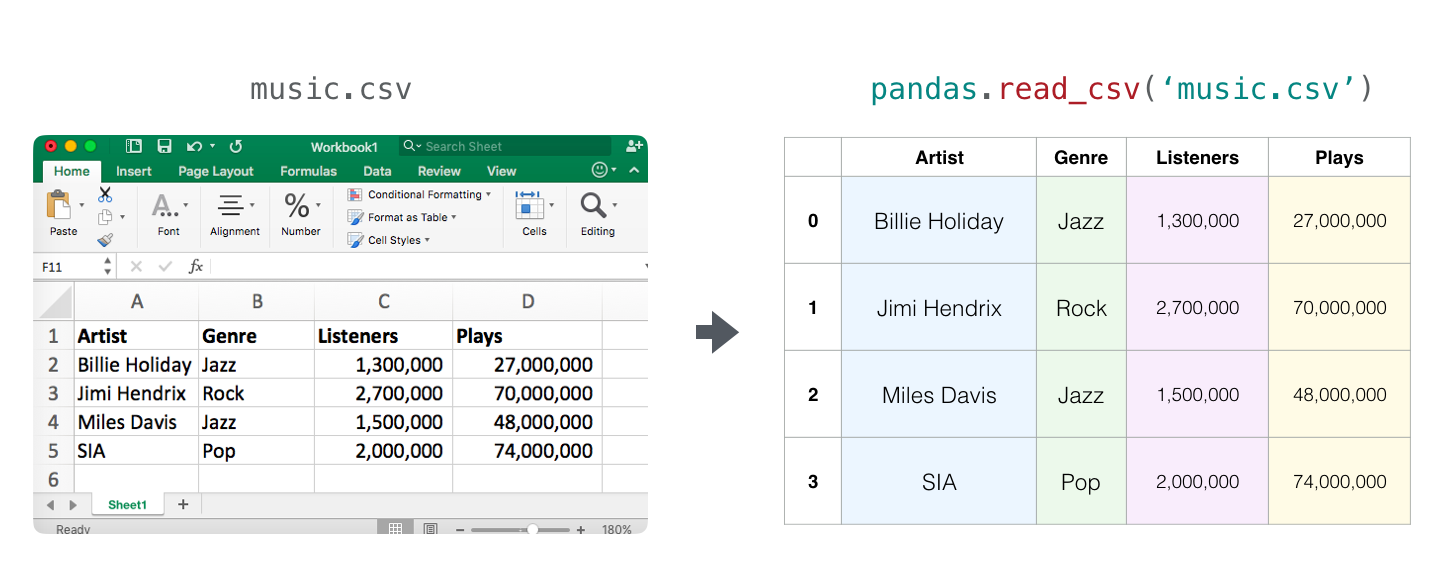

## Reading data

We will use gapminder dataset. [Gapminder](https://www.gapminder.org) is an independent Swedish foundation with no political, religious or economic affiliations. Gapminder fights devastating misconceptions about global development. Gapminder produces free teaching resources making the world understandable based on reliable statistics. Gapminder promotes a fact-based worldview everyone can understand. Today we will use the life expectancy dataset which is popular among data scientists.

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('gapminder.tsv', sep='\t')
## df --> dataframe is Pandas' default data type.

`DataFrame` is Pandas' data type.

In [ ]:
type(df)

If you read from a file, the default behavior is to give __row index__ (row number) as __row label__ (row name).

Dimensions of a data frame can be access with its `shape` attribute

In [ ]:
df.shape

In [ ]:
type(df.shape)

Note that `shape` is not a method. What's the data type of it?

In [ ]:
df.shape[0]

In [ ]:
df.shape[1]

You can obtain the column names:

In [ ]:
df.columns

In [ ]:
df.index

Yon can obtain the row indexes (may or may not be the same as row numbers, more to come)

In [ ]:
df.head(20)

In [ ]:
df.tail(20)

Data types (`dtypes`) of all columns (`object` means __string__ in the context of `pandas`)

In [ ]:
df.dtypes

In [ ]:
df.head(20)

Note that `dtypes` is an attribute. You can use `DataFrame.info()`

In [ ]:
df.info()

## Subsetting Columns

### Subsetting One Column

If __subsetting__ results in __only__ one column, the resultant object is _not_ `DataFrame` but `Series`. You can think of `Series` as a vector.

In [ ]:
df['continent']

In [ ]:
df['country']

In [ ]:
type(df['country'])

### Subsetting Multiple Columns

You need to pass a list of column names.

The resultant object is a `DataFrame`.

In [ ]:
columns = ['country', 'continent', 'year']


## Subsetting Rows

There are two methods for row indexing

|Subsetting Method | Description |
|------------------|-------------|
| `loc`            |Subset based on __index label__ (row name)|
|`iloc`            |Subset based on __index__ (row number)|


### Subsetting One Row (with index label)

Let's refresh our memory. Our `df` is:

In [ ]:
df.head()

In [ ]:
df.loc[10]

### Subsetting Multiple Rows (with the index labels)

You need to pass a list of row labels

In [ ]:
df.tail()

In [ ]:
df.iloc[1703]


### Subsetting One Row (with index number)

In [ ]:
df.loc[0]

In [ ]:
df.iloc[0]

### Subsetting Multiple Rows (with the indexes)

You need to pass a list of row indexes

In [ ]:
rows = [0, 10, 20, 100]
df.loc[rows]

In [ ]:
df.iloc[0:10]

In [ ]:
rows = [0, 10, 20, 100]
new = df.loc[rows]
new.loc[10]

## loc work with labels ##
## iloc work with indexes ##
## This only work with rows ##

In [ ]:
new.iloc[2]

if you want to access to the second row of the new data frame, you use `iloc` not `loc`.

Since `iloc` operates on the index, `-1` will work

## Subsetting Multiple Rows and Multiple Columns

In [ ]:
df.head()

In [ ]:
rows = [0, 1, 2, 10, 18, 100]
columns = ['country', 'continent', 'year', 'pop' ]

df.loc[rows, columns]

### Indexing multiple rows and columns with `iloc` rules

You can specify a range of row indexes and a range column indexes to subset. Here is how you would specify the index of the starting row and that of the ending row and the index of the starting column and that of that the ending column.

`df.iloc[start_row : end_row, start_column : end_column)]`

In [ ]:
df.iloc[0:10, 2:3]

if the index number to the left of the `:` or the index number to the right of the `:` is not provided, their default values are used.

`df.iloc[start_row : end_row, start_column : end_column)]`

- default for `start_row` is `0`
- default for `end_row` is `last row's index + 1`
- default for `start_column` is `0`
- default for `end_column` is `last column's index + 1`


The followings result in the same `df`.

In [ ]:
df.iloc[0:10:2, 0:6:2]

Sometimes, you may want not to gather all the rows or columns in a given range. In `iloc` indexing, you can specify __skipping increments__ as follows:

`df.iloc[start_row:end_row:row_increment, start_column:end_column:column_increment]`


- default value for `row_increment` is `1`
- default value for `column_increment` is `1` 

if we want to index first 8 rows and every other column starting with the `0` indexed column, here is how we can do it

In [ ]:
df.iloc[:9, ::2]

Subset every other row among the last 10 rows and all columns.

In [ ]:
df.iloc[-11:-1, :]

In [ ]:
new = df.tail(10)
new.iloc[0:10:2]

In [ ]:
new.iloc[-10::2]

## Grouping

In [2]:
df

NameError: name 'df' is not defined

In [6]:
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

Average life expectancy over the years

Average life expectancy over the years per continent

In [7]:
df.groupby(['continent', 'year'])['lifeExp'].mean()

continent  year
Africa     1952    39.135500
           1957    41.266346
           1962    43.319442
           1967    45.334538
           1972    47.450942
           1977    49.580423
           1982    51.592865
           1987    53.344788
           1992    53.629577
           1997    53.598269
           2002    53.325231
           2007    54.806038
Americas   1952    53.279840
           1957    55.960280
           1962    58.398760
           1967    60.410920
           1972    62.394920
           1977    64.391560
           1982    66.228840
           1987    68.090720
           1992    69.568360
           1997    71.150480
           2002    72.422040
           2007    73.608120
Asia       1952    46.314394
           1957    49.318544
           1962    51.563223
           1967    54.663640
           1972    57.319269
           1977    59.610556
           1982    62.617939
           1987    64.851182
           1992    66.537212
           1997    68.02051

You could also get average for multiple columns

In [ ]:
columns = ['lifeExp', 'pop', 'gdpPercap']
df.groupby(['year', 'continent'])[columns].mean()

### Flatten the grouped dataframe

In [ ]:
columns = ['lifeExp', 'pop', 'gdpPercap']
results = df.groupby(['year', 'continent'])[columns].mean().reset_index()
results

### Grouped Frequency Counts

How many different countries exist in each continent in `gapminder` dataset.

In [ ]:
df.groupby('continent')['country'].count()

In [ ]:
df.groupby('continent')['country'].nunique()

##nunique() counts only unique numbers in a dataset.##

## Exercise

We can read CSV or excel files to import data. We can also create dataframes programatically like this:

In [ ]:
df = pd.DataFrame({'Artist':['Billie Holiday','Jimi Hendrix', 'Miles Davis', 'SIA'],
                   'Genre': ['Jazz', 'Rock', 'Jazz', 'Pop'],
                   'Listeners': [1300000, 2700000, 1500000, 2000000],
                   'Plays': [27000000, 70000000, 48000000, 74000000]})

The variable df now contains a dataframe. Show the contents of the dataframe:

In [ ]:
df

Select the Artist column and show the content:

In [ ]:
df['Artist']

Select only row #0

In [ ]:
df.loc[0]

Select 'Artist' and 'Plays' for rows #1 and #2

In [ ]:
df.iloc[0:2, 0::3]

Find out the average number of listeners for each genre

In [ ]:
df.groupby('Genre')['Listeners'].mean()

Find out the maximum number of plays for each genre

In [ ]:
df.groupby('Genre')['Artist'].count()

In [ ]:
df['Artist']